In [3]:
import pandas as pd
import nltk
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.getcwd()

'/content'

In [6]:
os.chdir("/content/drive/MyDrive/mlasgmt")
os.getcwd()

'/content/drive/MyDrive/mlasgmt'

In [7]:
df = pd.read_excel("train.xlsx")

In [8]:
df.head()

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0
2,this app is very good for video conferencing.,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0


In [9]:
df.shape

(2061, 3)

## Exploratory data analysis

In [10]:
textLen = df['text'].str.len()
reasonLen = df['reason'].str.len()

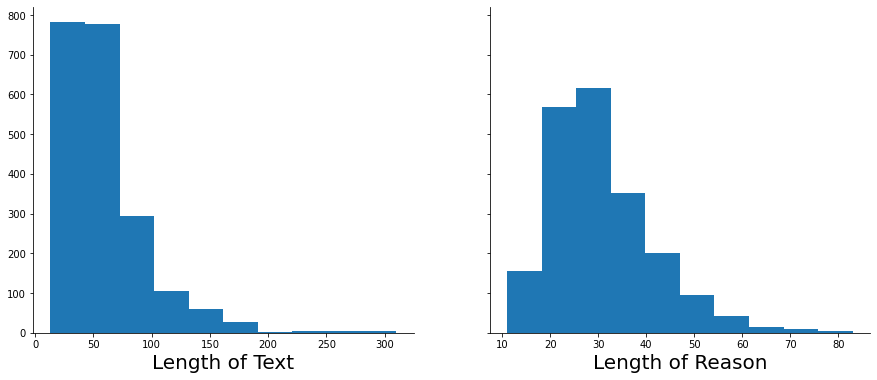

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
_ = ax[0].hist(textLen)
_ = ax[1].hist(reasonLen)
ax[0].set_xlabel("Length of Text", fontsize=20)
# ax[0].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("Length of Reason", fontsize=20)
sns.despine()

In [12]:
textWordLen = df["text"].str.split().map(lambda x: len(x))
reasonWordLen = df["reason"].str.split().map(lambda x: len(x))

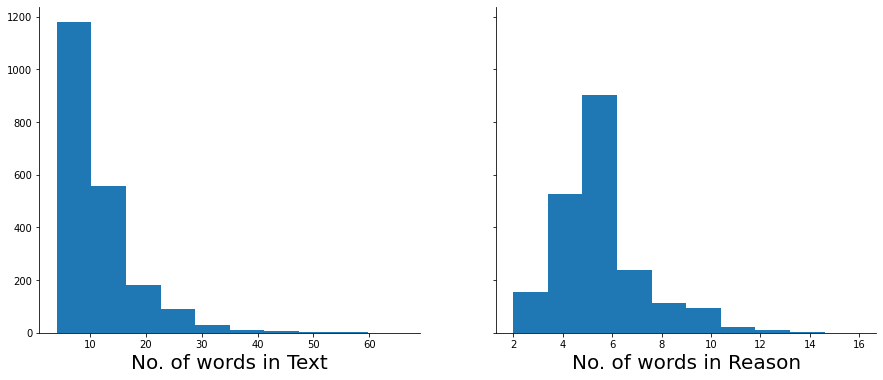

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
_ = ax[0].hist(textWordLen)
_ = ax[1].hist(reasonWordLen)
ax[0].set_xlabel("No. of words in Text", fontsize=20)
# ax[0].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("No. of words in Reason", fontsize=20)
sns.despine()

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
stop=set(stopwords.words('english'))

In [16]:
corpus=[]
new = df['text'].str.split()
new = new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
xtext, ytext =zip(*top)

In [17]:
len(dic.keys())

110

In [18]:
corpus=[]
new = df['reason'].str.split()
new = new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
xreason, yreason=zip(*top)

In [19]:
len(dic.keys())

73

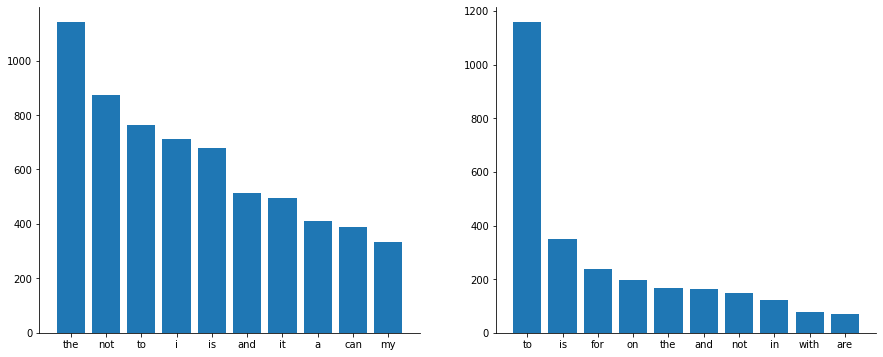

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].bar(xtext,ytext)
ax[1].bar(xreason,yreason)
sns.despine()

## Preprocess Tweets

 - We didn't remove stopwords bcoz its give meaning semantic comparison

In [21]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string, re
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
def remove_punc(data):
    trans = str.maketrans(' ','', string.punctuation)
    return data.translate(trans)
def remove_punctuation(text):
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    text = translator.sub(" ",text)
    return text
def remove_white_space(data):
    return ' '.join(data.split())

In [23]:
def stemming(data):
    stemmer = LancasterStemmer()
    stemmed = []
    for i in data:
        stem = stemmer.stem(i)
        stemmed.append(stem)
    return stemmed

In [24]:
def lemmatization(data):
    lemma = WordNetLemmatizer()
    lemmas = []
    for i in data:
        lem = lemma.lemmatize(i, pos='v')
        lemmas.append(lem)
    return lemmas  

In [25]:
def preprocessText(text):
    text = text.lower()
    text = re.sub(r"[\([{})\]]", "", text) ## removing brackets
    text = remove_punctuation(text)
    text = remove_white_space(text)
    tokens = nltk.word_tokenize(text)
    tokens = lemmatization(tokens)
    return " ".join(tokens)

In [26]:
df["clean_text"] = df["text"].map(preprocessText)

In [27]:
df.head()

,text,reason,label,clean_text
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0,this be an amaze app for online class but
1,very practical and easy to use,app is user-friendly,1.0,very practical and easy to use
2,this app is very good for video conferencing.,good for video conferencing,1.0,this app be very good for video conferencing
3,i can not download this zoom app,unable to download zoom app,1.0,i can not download this zoom app
4,i am not able to download this app,want to download the app,1.0,i be not able to download this app


In [28]:
import json

In [29]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

with open('model.json', 'r') as openfile:
    map_name_to_handle = json.load(openfile)

with open('preprocess.json', 'r') as openfile:
    map_model_to_preprocess = json.load(openfile)

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


# Models

In [30]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    text_batch, reason_batch, y_hat = [], [], []
    all_groups = list(range(in_groups[0].shape[0]))
    # print(len(all_groups))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        # print(group_idx)
        text_batch += [in_groups[0][c_idx] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            y_hat += [1]*batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
            b_group_idx = non_group_idx
            y_hat += [0]*batch_halfsize
            
        reason_batch += [in_groups[1][c_idx] for c_idx in b_group_idx]
            
    return np.stack(text_batch, 0), np.stack(reason_batch, 0), np.stack(y_hat, 0)

In [31]:
# text_batch, reason_batch, y_stack = gen_random_batch([df["text"], df["reason"]])
def siam_gen(in_groups, batch_size = 32):
    while True:
        text_stack, reason_stack, y_hatstack = gen_random_batch(in_groups, batch_size//2)
        yield [text_stack, reason_stack], y_hatstack

## Two encoder without bert model

In [32]:
%pip install -q transformers

     |████████████████████████████████| 4.7 MB 34.4 MB/s 
     |████████████████████████████████| 101 kB 14.2 MB/s 
     |████████████████████████████████| 596 kB 62.1 MB/s 
     |████████████████████████████████| 6.6 MB 52.2 MB/s 


In [33]:
from keras_self_attention import SeqSelfAttention
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras import Input

ModuleNotFoundError: ignored

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
text_dataset = tokenizer(list(df["clean_text"]), padding=True, return_tensors="tf")["input_ids"]
reason_dataset = tokenizer(list(df["reason"]), padding=True, return_tensors="tf")["input_ids"]

In [ ]:
text_dataset.shape, reason_dataset.shape

In [ ]:
def siamese_model(input1Shape, input2Shape):
    # text model
    text_in = Input(shape = (input1Shape, 1), name = 'text_Input')
    reason_in = Input(shape = (input2Shape, 1), name = 'reason_Input')
    
    #textDecoder 
    a = tfl.Bidirectional(tfl.LSTM(64, return_sequences=True))(text_in)
    a = tfl.Bidirectional(tfl.LSTM(128, return_sequences=True))(a)
    a = SeqSelfAttention()(a)
    a = tfl.Flatten()(a)
    a = tfl.Dense(64, activation="linear")(a)
    a = tfl.BatchNormalization()(a)
    a = tfl.Activation('relu')(a)
    a = tfl.Dense(32, activation="linear")(a)
    a = tfl.BatchNormalization()(a)
    a = tfl.Activation('relu')(a)
    
    #reasonDecoder
    b = tfl.Bidirectional(tfl.LSTM(64, return_sequences=True))(reason_in)
    b = tfl.Flatten()(b)
    b = tfl.Dense(64, activation="linear")(b)
    b = tfl.BatchNormalization()(b)
    b = tfl.Activation('relu')(b)
    b = tfl.Dense(32, activation="linear")(b)
    b = tfl.BatchNormalization()(b)
    b = tfl.Activation('relu')(b)

    combined_features = tfl.concatenate([a, b], name = 'merge_features')
    print(combined_features.shape)
    combined_features = tfl.Dense(16, activation = 'linear')(combined_features)
    combined_features = tfl.BatchNormalization()(combined_features)
    combined_features = tfl.Activation('relu')(combined_features)
    combined_features = tfl.Dense(4, activation = 'linear')(combined_features)
    combined_features = tfl.BatchNormalization()(combined_features)
    combined_features = tfl.Activation('relu')(combined_features)
    combined_features = tfl.Dense(1, activation = 'sigmoid')(combined_features)
    similarity_model = Model(inputs = [text_in, reason_in], outputs = [combined_features], name = 'Similarity_Model')
    return similarity_model


In [ ]:
similarity_model = siamese_model(text_dataset.shape[-1], reason_dataset.shape[-1])
similarity_model.summary()

(None, 64)
Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_Input (InputLayer)        [(None, 72, 1)]      0           []                               
                                                                                                  
 bidirectional_11 (Bidirectiona  (None, 72, 128)     33792       ['text_Input[0][0]']             
 l)                                                                                               
                                                                                                  
 bidirectional_12 (Bidirectiona  (None, 72, 256)     263168      ['bidirectional_11[0][0]']       
 l)                                                                                               
                                                                        

In [ ]:
# similarity_model = siamese_model(128, 128)
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = [tf.metrics.BinaryAccuracy()])

In [ ]:
loss_history = similarity_model.fit(siam_gen([text_dataset, reason_dataset], 128), steps_per_epoch=500, shuffle=True, epochs = 50, verbose = True)

Epoch 1/50
500/500 [==============================] - 79s 130ms/step - loss: 0.6693 - binary_accuracy: 0.5700
Epoch 2/50
500/500 [==============================] - 54s 108ms/step - loss: 0.6664 - binary_accuracy: 0.5756
Epoch 3/50
500/500 [==============================] - 54s 107ms/step - loss: 0.6623 - binary_accuracy: 0.5782
Epoch 4/50
500/500 [==============================] - 54s 109ms/step - loss: 0.6617 - binary_accuracy: 0.5789
Epoch 5/50
500/500 [==============================] - 54s 108ms/step - loss: 0.6559 - binary_accuracy: 0.5893
Epoch 6/50
500/500 [==============================] - 54s 108ms/step - loss: 0.6496 - binary_accuracy: 0.6002
Epoch 7/50
500/500 [==============================] - 54s 107ms/step - loss: 0.6341 - binary_accuracy: 0.6191
Epoch 8/50
500/500 [==============================] - 54s 107ms/step - loss: 0.6181 - binary_accuracy: 0.6359
Epoch 9/50
500/500 [==============================] - 54s 107ms/step - loss: 0.6078 - binary_accuracy: 0.6427
Epoch 10/5

KeyboardInterrupt: ignored

In [ ]:
similarity_model.save("models/firstModel.h5")

In [ ]:
results = similarity_model.predict([text_dataset, reason_dataset])

In [ ]:
eval_results = ((results > 0.5).astype(int)).squeeze()
np.mean(eval_results == df["label"])

0.2576419213973799

In [ ]:
df_test = pd.read_excel('evaluation.xlsx')
df_test["clean_text"] = df_test["text"].map(preprocessText)

In [ ]:
text_test = tokenizer(list(df_test["clean_text"]), padding="max_length", truncation=True, return_tensors="tf", max_length = 72)["input_ids"]
reason_test = tokenizer(list(df_test["reason"]), padding="max_length", truncation=True, return_tensors="tf", max_length=22)["input_ids"]

In [ ]:
text_test.shape,  reason_test.shape

(TensorShape([9000, 72]), TensorShape([9000, 22]))

In [ ]:
results = similarity_model.predict([text_test, reason_test])

In [ ]:
eval_results = (results > 0.5).astype(int).squeeze()

In [ ]:
np.mean(eval_results == df_test["label"])

0.5832222222222222

## Two encoders

In [34]:
import numpy as np

In [35]:
%pip install -q -U "tensorflow-text==2.8.*"
%pip install -q tf-models-official==2.7.0
%pip install -q keras-self-attention

     |████████████████████████████████| 4.9 MB 28.2 MB/s 
     |████████████████████████████████| 518.1 MB 27 kB/s 
     |████████████████████████████████| 462 kB 66.2 MB/s 
     |████████████████████████████████| 5.8 MB 69.6 MB/s 
     |████████████████████████████████| 1.4 MB 59.5 MB/s 
     |████████████████████████████████| 1.8 MB 32.8 MB/s 
     |████████████████████████████████| 1.1 MB 57.1 MB/s 
     |████████████████████████████████| 1.3 MB 55.7 MB/s 
     |████████████████████████████████| 238 kB 76.3 MB/s 
     |████████████████████████████████| 116 kB 75.2 MB/s 
     |████████████████████████████████| 352 kB 73.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 99 kB 12.3 MB/s 


In [36]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
def siamese_model():
    # text model
    # text_in = Input(shape = (input1Shape, 1), name = 'text_Input')
    # reason_in = Input(shape = (input2Shape, 1), name = 'reason_Input')
    
    #textDecoder 
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']

    a = tfl.Dense(64, activation="linear")(net)
    a = tfl.BatchNormalization()(a)
    a = tfl.Activation('relu')(a)
    a = tfl.Dense(32, activation="linear")(a)
    a = tfl.BatchNormalization()(a)
    a = tfl.Activation('relu')(a)
    

    #reasonDecoder
    reason_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
    encoder_inputs = preprocessing_layer(reason_input)
    # b = tfl.Bidirectional(tfl.LSTM(64, return_sequences=True))(encoder_inputs["input_word_ids"])
    b = tfl.Dense(64, activation="linear")(encoder_inputs["input_word_ids"])
    b = tfl.BatchNormalization()(b)
    b = tfl.Activation('relu')(b)
    b = tfl.Dense(32, activation="linear")(b)
    b = tfl.BatchNormalization()(b)
    b = tfl.Activation('relu')(b)

    combined_features = tfl.concatenate([a, b], name = 'merge_features')
    print(combined_features.shape)
    combined_features = tfl.Dense(16, activation = 'linear')(combined_features)
    combined_features = tfl.BatchNormalization()(combined_features)
    combined_features = tfl.Activation('relu')(combined_features)
    combined_features = tfl.Dense(4, activation = 'linear')(combined_features)
    combined_features = tfl.BatchNormalization()(combined_features)
    combined_features = tfl.Activation('relu')(combined_features)
    combined_features = tfl.Dense(1, activation = 'sigmoid')(combined_features)
    similarity_model = Model(inputs = [text_input, reason_input], outputs = [combined_features], name = 'Similarity_Model')
    return similarity_model


In [38]:
similarity_model = siamese_model()
similarity_model.summary()

(None, 64)
Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['input_1[0][0]']                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                

In [39]:
filepath="models/secondModel.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
# similarity_model = siamese_model(128, 128)
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = [tf.metrics.BinaryAccuracy()])

In [ ]:
# valid_a, valid_b, valid_sim = gen_random_batch([df["clean_text"], reason_dataset[""]], 64)

In [ ]:
loss_history = similarity_model.fit(siam_gen([df["clean_text"], df["reason"]], 128), steps_per_epoch=500, shuffle=True, 
                                    epochs = 10, verbose = True, callbacks=callbacks_list)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.6368 - binary_accuracy: 0.6297
Epoch 1: loss improved from inf to 0.63682, saving model to models/secondModel.h5
500/500 [==============================] - 610s 1s/step - loss: 0.6368 - binary_accuracy: 0.6297
Epoch 2/10
 87/500 [====>.........................] - ETA: 8:15 - loss: 0.5460 - binary_accuracy: 0.7285

In [ ]:
similarity_model.save("models/secondModel.h5")

In [ ]:
df_test = pd.read_excel('evaluation.xlsx')

In [ ]:
df_test["clean_text"] = df_test["text"].map(preprocessText)

In [ ]:
df_test["clean_text"][0]

'the app be crash when i play a vedio'

In [ ]:
df_test["clean_text"].shape

(9000,)

In [ ]:
results = similarity_model.predict([df_test["clean_text"], df_test["reason"]])

In [ ]:
similarity_model.save_weights("model/")

In [ ]:
sum((results >= 0.5).astype(int))

array([2158])

In [ ]:
eval_result = (results >= 0.5).astype(int).squeeze()

In [ ]:
np.mean([df_test["label"] == eval_result])

0.6138888888888889

In [ ]:
sum(df_test["label"])

3001.0

In [ ]:
results[115]

array([0.5439254], dtype=float32)

In [ ]:
model.save("similarity_model.h5")

## Siamese TF Cosine Distance Fine Tune

In [ ]:
import math as m

In [ ]:
huburl = "https://tfhub.dev/google/universal-sentence-encoder/4" 

In [ ]:
fine_tuned_module_object = hub.load(huburl)

KeyboardInterrupt: ignored

In [ ]:
def get_model():
    left_input = tf.keras.Input(shape=(), dtype=tf.string)
    right_input = tf.keras.Input(shape=(), dtype=tf.string)

    hub.KerasLayer(fine_tuned_module_object,trainable=True)
    embedding_left_output= shared_embedding_layer(left_input)
    embedding_right_output= shared_embedding_layer(right_input)

    cosine_similiarity= tf.keras.layers.Dot(axes=-1,normalize=True)([embedding_left_output,embedding_right_output])
    clip_cosine_similarities = tf.clip_by_value(cosine_similiarity, -1.0, 1.0)
    cos_distance = 1.0 - (tf.acos(clip_cosine_similarities)/m.pi)

    return tf.keras.Model([left_input,right_input], cos_distance)

In [ ]:
model = get_model()

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_17[0][0]',               
                                                                  'input_18[0][0]']               
                                                                                                  
 dot_8 (Dot)                    (None, 1)            0           ['keras_layer[2][0]',      